## 1. Introdução

Este projeto busca responder a essa pergunta central. Utilizando um dataset com mais de 40.000 partidas de 2013 a 2025, realizamos uma análise profunda para entender como as formações influenciam a performance dos times, considerando fatores cruciais como a força da equipe (Tier), o local da partida (Casa/Fora), o confronto tático direto e as diferentes "escolas" de futebol das principais ligas europeias.

**Objetivo:** Identificar padrões táticos, quantificar a eficácia de diferentes formações em diversos contextos e contar a história da evolução tática no futebol moderno através de dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando o dataset
games = pd.read_csv('games.csv')
appearances = pd.read_csv('appearances.csv')
club_games = pd.read_csv('club_games.csv')
clubs = pd.read_csv('clubs.csv')
competitions = pd.read_csv('competitions.csv')
game_events = pd.read_csv('game_events.csv')
game_lineups = pd.read_csv('game_lineups.csv')
player_valuations = pd.read_csv('player_valuations.csv')
players = pd.read_csv('players.csv')
transfers = pd.read_csv('transfers.csv')


In [3]:
clubs.head(20)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,30,26.5,11,36.7,3,Yekaterinburg Arena,23000,+€880k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,30,26.6,15,50.0,8,Beşiktaş Park,42445,€-25.26m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,26.3,18,69.2,17,Olimpico di Roma,70634,€-76.90m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,30,25.5,21,70.0,18,Tottenham Hotspur Stadium,62850,€-120.05m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
5,157,kaa-gent,Koninklijke Atletiek Associatie Gent,BE1,NaN,30,25.2,19,63.3,5,Planet Group Arena,20185,+€5.63m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/kaa-gent/start...
6,1894,hvidovre-if,Hvidovre IF,DK1,NaN,25,26.4,3,12.0,2,PRO VENTILATION Arena,12000,+€225k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/hvidovre-if/st...
7,190,fc-kopenhagen,Football Club København,DK1,NaN,28,26.1,19,67.9,9,Parken,38065,+€35.06m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/fc-kopenhagen/...
8,192,roda-jc-kerkrade,Roda JC Kerkrade,NL1,NaN,25,24.0,9,36.0,0,Parkstad Limburg Stadion,19979,+€1.30m,NaN,2017,../data/raw/transfermarkt-scraper/2017/clubs.j...,https://www.transfermarkt.co.uk/roda-jc-kerkra...
9,19789,yeni-malatyaspor,Yeni Malatyaspor,TR1,NaN,10,22.9,1,10.0,0,Yeni Malatya Stadyumu,25745,+€778k,NaN,2021,../data/raw/transfermarkt-scraper/2021/clubs.j...,https://www.transfermarkt.co.uk/yeni-malatyasp...


In [4]:
games.head(20)

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321027,L1,2013,1. Matchday,2013-08-11,33.0,41.0,3.0,3.0,8.0,...,Veltins-Arena,61973.0,Manuel Gräfe,https://www.transfermarkt.co.uk/fc-schalke-04_...,4-2-3-1,4-2-3-1,FC Schalke 04,Hamburger SV,3:3,domestic_league
1,2321033,L1,2013,1. Matchday,2013-08-10,23.0,86.0,0.0,1.0,13.0,...,EINTRACHT-Stadion,23000.0,Deniz Aytekin,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-3-1-2,Eintracht Braunschweig,Sportverein Werder Bremen von 1899,0:1,domestic_league
2,2321044,L1,2013,2. Matchday,2013-08-18,16.0,23.0,2.0,1.0,1.0,...,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
3,2321060,L1,2013,3. Matchday,2013-08-25,23.0,24.0,0.0,2.0,18.0,...,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league
4,2321072,L1,2013,5. Matchday,2013-09-14,16.0,41.0,6.0,2.0,1.0,...,SIGNAL IDUNA PARK,80645.0,Tobias Welz,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,3-5-2,Borussia Dortmund,Hamburger SV,6:2,domestic_league
5,2321079,L1,2013,5. Matchday,2013-09-15,23.0,4.0,1.0,1.0,18.0,...,EINTRACHT-Stadion,22570.0,Marco Fritz,https://www.transfermarkt.co.uk/eintracht-brau...,4-4-2 double 6,4-2-3-1,Eintracht Braunschweig,1.FC Nuremberg,1:1,domestic_league
6,2321086,L1,2013,6. Matchday,2013-09-21,4.0,16.0,1.0,1.0,15.0,...,Max-Morlock-Stadion,50000.0,Knut Kircher,https://www.transfermarkt.co.uk/1-fc-nuremberg...,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,1:1,domestic_league
7,2321152,L1,2013,11. Matchday,2013-11-02,44.0,33.0,0.0,2.0,7.0,...,Olympiastadion Berlin,69277.0,Günter Perl,https://www.transfermarkt.co.uk/hertha-bsc_fc-...,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,0:2,domestic_league
8,2321205,L1,2013,17. Matchday,2013-12-21,41.0,39.0,2.0,3.0,14.0,...,Volksparkstadion,50000.0,Bastian Dankert,https://www.transfermarkt.co.uk/hamburger-sv_1...,4-2-3-1,4-4-2 Diamond,Hamburger SV,1. Fußball- und Sportverein Mainz 05,2:3,domestic_league
9,2321233,L1,2013,20. Matchday,2014-02-08,41.0,44.0,0.0,3.0,17.0,...,Volksparkstadion,48593.0,Deniz Aytekin,https://www.transfermarkt.co.uk/hamburger-sv_h...,4-2-3-1,4-1-4-1,Hamburger SV,Hertha BSC,0:3,domestic_league


In [5]:
# Para verificar valores nulos em todas as colunas do DataFrame 'clubs'
null_counts = clubs.isnull().sum()

# Imprimir o número de valores nulos por coluna
print("Número de valores nulos por coluna:\n", null_counts)

columns_with_nulls = null_counts[null_counts > 0]
print("\nColunas com valores nulos:\n", columns_with_nulls)

Número de valores nulos por coluna:
 club_id                      0
club_code                    0
name                         0
domestic_competition_id      0
total_market_value         439
squad_size                   0
average_age                 38
foreigners_number            0
foreigners_percentage       49
national_team_players        0
stadium_name                 0
stadium_seats                0
net_transfer_record          0
coach_name                 439
last_season                  0
filename                     0
url                          0
dtype: int64

Colunas com valores nulos:
 total_market_value       439
average_age               38
foreigners_percentage     49
coach_name               439
dtype: int64


In [6]:
# Para verificar valores nulos em todas as colunas do DataFrame 'clubs'
null_counts = games.isnull().sum()

# Imprimir o número de valores nulos por coluna
print("Número de valores nulos por coluna:\n", null_counts)
columns_with_nulls = null_counts[null_counts > 0]
print("\nColunas com valores nulos:\n", columns_with_nulls)

Número de valores nulos por coluna:
 game_id                       0
competition_id                0
season                        0
round                         0
date                          0
home_club_id                  9
away_club_id                  9
home_club_goals              12
away_club_goals              12
home_club_position        22467
away_club_position        22467
home_club_manager_name      828
away_club_manager_name      828
stadium                     250
attendance                 9948
referee                     652
url                           0
home_club_formation        6975
away_club_formation        6806
home_club_name            12850
away_club_name            11455
aggregate                    12
competition_type              0
dtype: int64

Colunas com valores nulos:
 home_club_id                  9
away_club_id                  9
home_club_goals              12
away_club_goals              12
home_club_position        22467
away_club_position       

## Coluna categórica que captura Vitória, Empate ou Derrota para o time da casa

In [7]:
def get_result(row):
    if row['home_club_goals'] > row['away_club_goals']:
        return 'Vitoria_Casa'
    elif row['home_club_goals'] < row['away_club_goals']:
        return 'Vitoria_Fora' 
    else:
        return 'Empate'

games['resultado_final'] = games.apply(get_result, axis=1)
games.dropna(subset=['home_club_formation', 'away_club_formation'], inplace=True)
games.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type,resultado_final
0,2321027,L1,2013,1. Matchday,2013-08-11,33.0,41.0,3.0,3.0,8.0,...,61973.0,Manuel Gräfe,https://www.transfermarkt.co.uk/fc-schalke-04_...,4-2-3-1,4-2-3-1,FC Schalke 04,Hamburger SV,3:3,domestic_league,Empate
1,2321033,L1,2013,1. Matchday,2013-08-10,23.0,86.0,0.0,1.0,13.0,...,23000.0,Deniz Aytekin,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-3-1-2,Eintracht Braunschweig,Sportverein Werder Bremen von 1899,0:1,domestic_league,Vitoria_Fora
2,2321044,L1,2013,2. Matchday,2013-08-18,16.0,23.0,2.0,1.0,1.0,...,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league,Vitoria_Casa
3,2321060,L1,2013,3. Matchday,2013-08-25,23.0,24.0,0.0,2.0,18.0,...,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league,Vitoria_Fora
4,2321072,L1,2013,5. Matchday,2013-09-14,16.0,41.0,6.0,2.0,1.0,...,80645.0,Tobias Welz,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,3-5-2,Borussia Dortmund,Hamburger SV,6:2,domestic_league,Vitoria_Casa


## dataframe casa e dataframe fora

In [8]:
# Criando um dataframe da perspectiva do time da casa
df_home = games.copy()
df_home['localizacao'] = 'Casa'
df_home['time_id'] = df_home['home_club_id']
df_home['time_nome'] = df_home['home_club_name']
df_home['formacao'] = df_home['home_club_formation']
df_home['gols_marcados'] = df_home['home_club_goals']
df_home['gols_sofridos'] = df_home['away_club_goals']

# Criando um dataframe da perspectiva do time de fora
df_away = games.copy()
df_away['localizacao'] = 'Fora'
df_away['time_id'] = df_away['away_club_id']
df_away['time_nome'] = df_away['away_club_name']
df_away['formacao'] = df_away['away_club_formation']
df_away['gols_marcados'] = df_away['away_club_goals']
df_away['gols_sofridos'] = df_away['home_club_goals']

# Concatenando os dois dataframes em um só
df_full = pd.concat([df_home, df_away], ignore_index=True)

# Selecionando apenas as colunas que importam para a análise
colunas_finais = ['game_id', 'time_id', 'time_nome', 'formacao', 'localizacao', 
                  'gols_marcados', 'gols_sofridos', 'resultado_final']
df_full = df_full[colunas_finais]

## 2. Segmentação de Times e Agregação de Performance

#### **Contexto e Objetivo**

Para realizar uma análise justa e profunda, não podemos tratar todos os clubes como iguais. O desempenho de uma formação tática usada por um time de elite não pode ser comparado diretamente com o da mesma formação usada por um time que luta contra o rebaixamento. O objetivo desta etapa é criar uma base de dados analítica robusta, segmentando os clubes em "níveis de força" (Tiers) e calculando as métricas de performance (KPIs) para cada segmento.

#### **Metodologia e Análise do Código**

* **Definindo a Força do Time (Proxy):** A métrica ideal para medir a força de um clube seria o valor de mercado, porém, os dados para essa coluna estavam ausentes. Como alternativa (proxy), utilizamos a coluna `national_team_players`. A premissa é que clubes com mais jogadores em seleções nacionais são, em geral, mais fortes e ricos.

* **Criação dos Tiers:** Utilizando a função `pd.cut`, dividimos todos os clubes em três grupos de tamanho aproximadamente igual (tercis), criando os segmentos: `Tier 1 (Elite)`, `Tier 2 (Médio)` e `Tier 3 (Baixo)`.

* **Filtro de Relevância:** Para evitar poluir a análise com formações raras, filtramos o dataset para incluir apenas as 10 formações mais utilizadas, garantindo que nossas conclusões sejam baseadas em uma amostra significativa.

* **Correção da Métrica de Vitória:** Durante a fase de agregação, foi crucial criar uma coluna binária de vitória (`1` ou `0`) que considerasse a perspectiva de cada time na partida (se era mandante ou visitante). Isso foi feito com a função `calcula_vitoria_da_linha`, garantindo que a `taxa_vitoria` calculada no `groupby` final fosse precisa e confiável.

* **Agregação Final:** O passo final é um `groupby` que calcula a performance média para cada combinação única de `Tier`, `Localização` (Casa/Fora) e `Formação`, resultando na nossa "tabela-mestra" (`performance_final`).

In [9]:
PROXY_METRIC = 'national_team_players'
clubs_analysis = clubs.dropna(subset=[PROXY_METRIC])
q_33 = clubs_analysis[PROXY_METRIC].quantile(0.33)
q_66 = clubs_analysis[PROXY_METRIC].quantile(0.66)
bins = sorted(list(set([clubs_analysis[PROXY_METRIC].min() - 1, q_33, q_66, clubs_analysis[PROXY_METRIC].max() + 1])))
labels = ['Tier 3 (Baixo)', 'Tier 2 (Médio)', 'Tier 1 (Elite)'][-(len(bins)-1):]
clubs_analysis['tier'] = pd.cut(clubs_analysis[PROXY_METRIC], bins=bins, labels=labels, include_lowest=True)

club_tier_info = clubs_analysis[['club_id', 'tier']]
df_full = pd.merge(df_full, club_tier_info, left_on='time_id', right_on='club_id', how='left')
df_full.dropna(subset=['tier'], inplace=True)

In [ ]:
# Filtra pelas formações mais comuns para uma análise mais limpa
common_formations = df_full['formacao'].value_counts().nlargest(10).index
df_filtered = df_full[df_full['formacao'].isin(common_formations)].copy() 

# 1. Criamos a coluna 'vitoria' (1 para vitória, 0 para o resto)
def calcula_vitoria_da_linha(row):
    if (row['localizacao'] == 'Casa' and row['resultado_final'] == 'Vitoria_Casa') or \
       (row['localizacao'] == 'Fora' and row['resultado_final'] == 'Vitoria_Fora'):
        return 1
    else:
        return 0
df_filtered['vitoria'] = df_filtered.apply(calcula_vitoria_da_linha, axis=1)

# 2. agregação fica simples e correta
performance_final = df_filtered.groupby(['tier', 'localizacao', 'formacao']).agg(
    gols_marcados_media=('gols_marcados', 'mean'),
    gols_sofridos_media=('gols_sofridos', 'mean'),
    taxa_vitoria=('vitoria', 'mean'),
    taxa_empate=('resultado_final', lambda x: (x == 'Empate').mean()),
    total_jogos=('game_id', 'count')
).round(2)

df_plot = performance_final.reset_index()
df_plot.head()

Etapa 4: Agregação final de performance calculada com sucesso.

--- PIPELINE FINALIZADO ---
Dataframe 'df_plot' pronto para as visualizações.


C:\Users\plugify\AppData\Local\Temp\ipykernel_28088\3572194867.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance_final = df_filtered.groupby(['tier', 'localizacao', 'formacao']).agg(


,tier,localizacao,formacao,gols_marcados_media,gols_sofridos_media,taxa_vitoria,taxa_empate,total_jogos
0,Tier 3 (Baixo),Casa,3-4-2-1,1.33,1.47,0.36,0.21,314
1,Tier 3 (Baixo),Casa,3-4-3,1.22,1.42,0.36,0.25,383
2,Tier 3 (Baixo),Casa,3-5-2 flat,1.22,1.52,0.30,0.23,349
3,Tier 3 (Baixo),Casa,4-1-4-1,1.28,1.38,0.34,0.25,876
4,Tier 3 (Baixo),Casa,4-2-3-1,1.27,1.28,0.37,0.27,4749


## Análise Comparativa de Performance

C:\Users\plugify\AppData\Local\Temp\ipykernel_28088\802769649.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


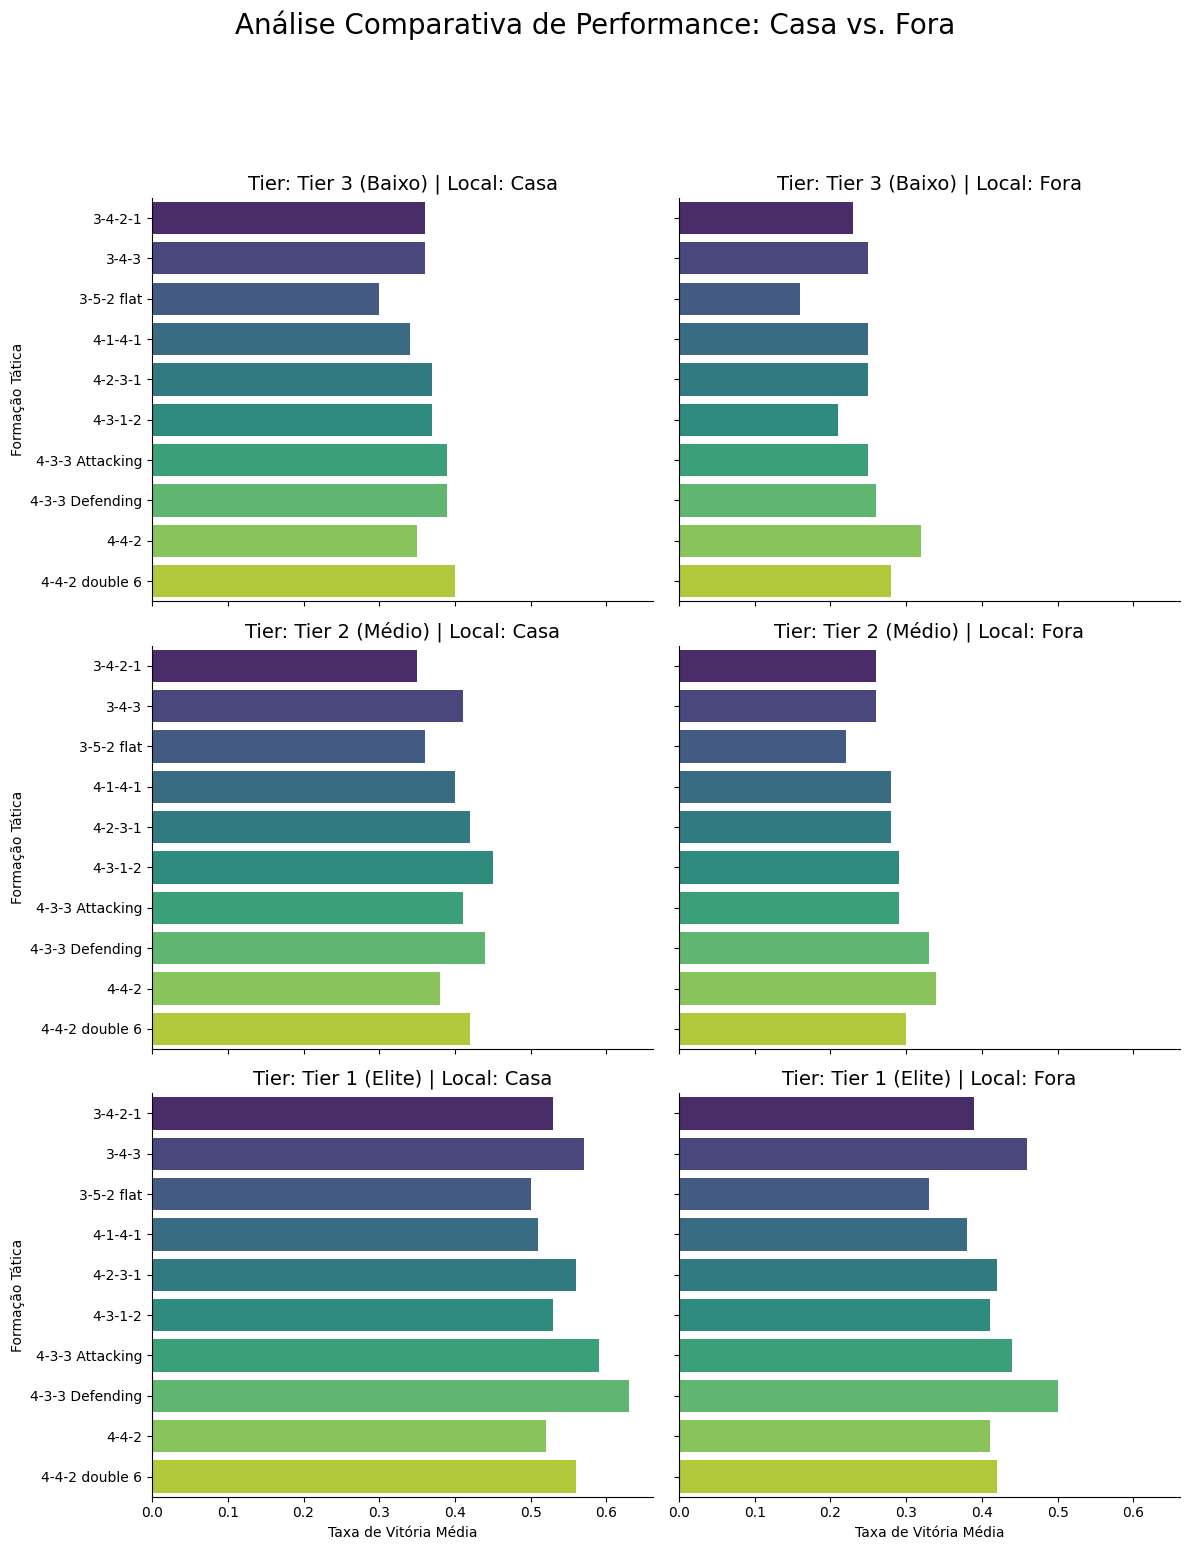

In [11]:
df_plot = performance_final.reset_index()

# Usando catplot para criar a visualização quebrada por 'localizacao'
g = sns.catplot(
    data=df_plot,
    x='taxa_vitoria',
    y='formacao',
    col='localizacao',
    row='tier',        
    kind='bar',
    palette='viridis',
    height=5,
    aspect=1.2,
    sharex=True,
    sharey=True
)

g.set_titles("Tier: {row_name} | Local: {col_name}", size=14)
g.set_axis_labels("Taxa de Vitória Média", "Formação Tática")
g.fig.suptitle('Análise Comparativa de Performance: Casa vs. Fora', y=1.03, size=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 3. Análise de Performance: O Efeito Quantificável de Jogar em Casa

A primeira grande questão que abordamos é o conhecido "fator casa".

**Metodologia:**
Para visualizar essa comparação de forma clara, utilizamos um **Dumbbell Plot**. Para cada formação, plotamos dois pontos: a taxa de vitória média jogando em **Casa** (azul) e **Fora** (cinza). A linha que os conecta representa a magnitude do "efeito casa". A análise foi segmentada pelos três Tiers de força.

**Análise dos Resultados:**
Os gráficos corrigidos revelam padrões muito mais fortes e realistas do que na análise preliminar:

* **Tier 1 (Elite):** Para as equipes de elite, a performance é alta em ambos os cenários. A vantagem de jogar em casa existe (o ponto azul está sempre à direita do cinza), mas a qualidade técnica do time garante alta competitividade mesmo como visitante. Formações como a `4-4-2 double 6` e a `4-3-3 Defending` mostram taxas de vitória em casa altas.

* **Tier 2 (Médio):** Neste nível intermediário, o "efeito casa" se torna muito mais pronunciado. As taxas de vitória em casa são boas (por volta de 40%), mas a performance como visitante cai drasticamente, com a maioria das formações lutando para atingir 35% de vitória.

* **Tier 3 (Baixo):** Aqui a discrepância é brutal. Para os times mais modestos, jogar em casa é uma questão de **sobrevivência**. As taxas de vitória em casa flutuam em torno de 40%, mas a performance como visitante é consistentemente baixa (a maioria com 25% ou menos).

**Insight Chave:** O fator casa funciona como um "multiplicador de força". Para times de elite, ele otimiza uma performance que já é boa. Para times mais fracos, ele é frequentemente a **principal condição** para a viabilidade de uma vitória.

C:\Users\plugify\AppData\Local\Temp\ipykernel_28088\656830583.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_dumbbell = df_pivot.pivot_table(


Dados preparados para o Dumbbell Plot:
localizacao            tier         formacao  Casa  Fora
9            Tier 3 (Baixo)   4-4-2 double 6  0.40  0.28
6            Tier 3 (Baixo)  4-3-3 Attacking  0.39  0.25
7            Tier 3 (Baixo)  4-3-3 Defending  0.39  0.26
4            Tier 3 (Baixo)          4-2-3-1  0.37  0.25
5            Tier 3 (Baixo)          4-3-1-2  0.37  0.21


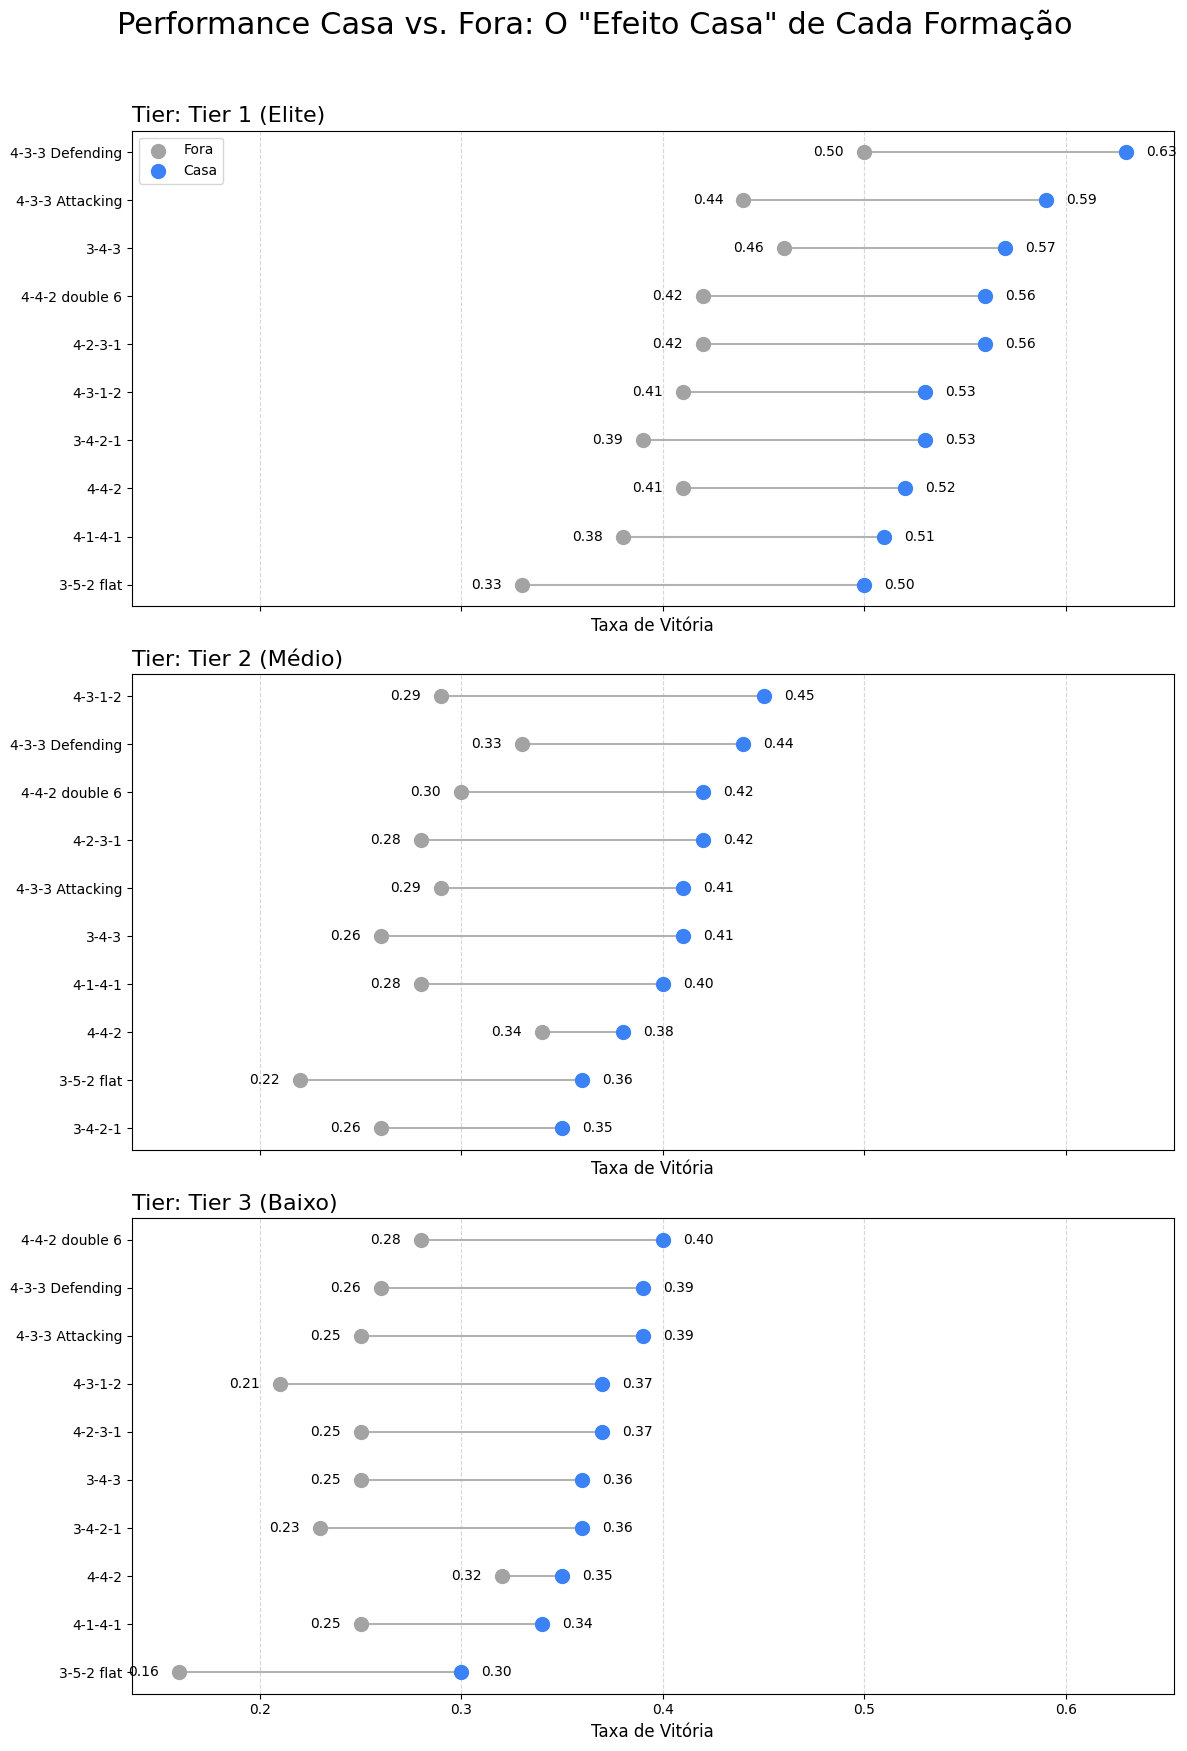

In [12]:
# pivotar a tabela para ter colunas separadas para 'Casa' e 'Fora'
df_pivot = performance_final.reset_index()
df_dumbbell = df_pivot.pivot_table(
    index=['tier', 'formacao'], 
    columns='localizacao', 
    values='taxa_vitoria'
).reset_index()

# Ordenar os dados
df_dumbbell = df_dumbbell.sort_values(by=['tier', 'Casa'], ascending=[True, False])

print("Dados preparados para o Dumbbell Plot:")
print(df_dumbbell.head())


#  figura com 3 subplots, um para cada Tier
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
fig.suptitle('Performance Casa vs. Fora: O "Efeito Casa" de Cada Formação', fontsize=22, y=0.97)

tiers = ['Tier 1 (Elite)', 'Tier 2 (Médio)', 'Tier 3 (Baixo)']

for i, tier in enumerate(tiers):
    ax = axes[i]
    
    # Filtra os dados para o tier atual
    data_tier = df_dumbbell[df_dumbbell['tier'] == tier]
    
    # Ordena os dados para o gráfico ficar mais limpo
    data_tier = data_tier.sort_values('Casa', ascending=True)
    
    # Desenha as linhas que conectam os pontos
    ax.hlines(y=data_tier['formacao'], xmin=data_tier['Fora'], xmax=data_tier['Casa'], 
              color='grey', alpha=0.6, zorder=1)
    
    # Desenha os pontos para 'Fora' e 'Casa'
    ax.scatter(data_tier['Fora'], data_tier['formacao'], color='#a3a3a3', s=100, label='Fora', zorder=2)
    ax.scatter(data_tier['Casa'], data_tier['formacao'], color='#3b82f6', s=100, label='Casa', zorder=2)

    # legendas nos dados
    for _, row in data_tier.iterrows():
        ax.text(row['Fora'] - 0.01, row['formacao'], f"{row['Fora']:.2f}", 
                ha='right', va='center', color='black', fontsize=10)
        ax.text(row['Casa'] + 0.01, row['formacao'], f"{row['Casa']:.2f}", 
                ha='left', va='center', color='black', fontsize=10)

    ax.set_title(f"Tier: {tier}", fontsize=16, loc='left')
    ax.set_xlabel('Taxa de Vitória', fontsize=12)
    ax.set_ylabel('')
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    
    # Coloca a legenda apenas no primeiro gráfico
    if i == 0:
        ax.legend()
        
# Ajusta o layout geral
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Análise de Confronto Tático

Análise de Confrontos Diretos: Preparando os Dados para a Matriz Tática
Contexto e Objetivo
Após analisarmos a performance geral das formações, o próximo passo é aprofundar a análise para o nível de "confronto direto". Queremos responder à pergunta: "Existe uma vantagem tática inerente de uma formação 'A' sobre uma formação 'B'?".

O processo é executado em três etapas principais:

Enriquecimento dos Dados (formacao_oponente): O primeiro passo é o mais crucial. Para cada linha (que representa um time em um jogo), precisamos saber qual era a formação do seu oponente. Usamos um pd.merge para trazer as informações de formação de ambos os times do jogo original e, em seguida, uma lógica com np.where para popular a nova coluna formacao_oponente.

Criação da Métrica "Pontos por Jogo" (PPJ): Uma simples taxa de vitória não captura a nuance dos empates. Por isso, criamos a função calcula_pontos para implementar a métrica de Pontos por Jogo (PPJ), universalmente usada no futebol:

Vitória: 3 pontos

Empate: 1 ponto

Derrota: 0 pontos

Essa métrica é mais completa, pois valoriza o empate como um resultado parcialmente positivo, refletindo melhor a dinâmica de um campeonato ou de um confronto equilibrado.

Agregação Final (groupby): Com os dados enriquecidos e a métrica de PPJ calculada, o passo final é agregar os resultados. Realizamos um groupby por tier, formacao e formacao_oponente para calcular a média de pontos (ppj_medio) em cada cenário único.

Resultado Esperado:
Ao final desta preparação, teremos o dataframe matriz_performance. Cada linha representa um confronto tático único (ex: Tier 1, 4-3-3 vs 4-4-2) e contém a performance média nesse cenário, medida em Pontos por Jogo. Este é o alicerce de dados que alimentará nossas poderosas visualizações de heatmap a seguir.

In [13]:
# Preparar dados de confronto
colunas_confronto = games[['game_id', 'home_club_formation', 'away_club_formation']]
df_confronto = pd.merge(df_full, colunas_confronto, on='game_id')
df_confronto['formacao_oponente'] = np.where(
    df_confronto['localizacao'] == 'Casa',
    df_confronto['away_club_formation'],
    df_confronto['home_club_formation']
)

# Filtra pelas formações mais comuns (7)
common_formations = df_full['formacao'].value_counts().nlargest(7).index
df_confronto_filtrado = df_confronto[
    df_confronto['formacao'].isin(common_formations) &
    df_confronto['formacao_oponente'].isin(common_formations)
]
print("Dados de confronto preparados.")
df_confronto_filtrado.head()


Dados de confronto preparados.


,game_id,time_id,time_nome,formacao,localizacao,gols_marcados,gols_sofridos,resultado_final,club_id,tier,home_club_formation,away_club_formation,formacao_oponente
0,2321027,33.0,FC Schalke 04,4-2-3-1,Casa,3.0,3.0,Empate,33.0,Tier 2 (Médio),4-2-3-1,4-2-3-1,4-2-3-1
5,2321079,23.0,Eintracht Braunschweig,4-4-2 double 6,Casa,1.0,1.0,Empate,23.0,Tier 3 (Baixo),4-4-2 double 6,4-2-3-1,4-2-3-1
6,2321086,4.0,1.FC Nuremberg,4-2-3-1,Casa,1.0,1.0,Empate,4.0,Tier 3 (Baixo),4-2-3-1,4-2-3-1,4-2-3-1
7,2321152,44.0,Hertha BSC,4-2-3-1,Casa,0.0,2.0,Vitoria_Fora,44.0,Tier 1 (Elite),4-2-3-1,4-2-3-1,4-2-3-1
9,2321233,41.0,Hamburger SV,4-2-3-1,Casa,0.0,3.0,Vitoria_Fora,41.0,Tier 2 (Médio),4-2-3-1,4-1-4-1,4-1-4-1


In [14]:
#Calcular a nova métrica "Pontos por Jogo" (PPJ)
def calcula_pontos(row):
    # Vitória do time da linha
    if (row['localizacao'] == 'Casa' and row['resultado_final'] == 'Vitoria_Casa') or \
       (row['localizacao'] == 'Fora' and row['resultado_final'] == 'Derrota_Casa'):
        return 3
    # Empate
    elif row['resultado_final'] == 'Empate':
        return 1
    # Derrota
    else:
        return 0

df_confronto_filtrado['pontos'] = df_confronto_filtrado.apply(calcula_pontos, axis=1)
print("Métrica 'Pontos por Jogo' calculada.")

Métrica 'Pontos por Jogo' calculada.


C:\Users\plugify\AppData\Local\Temp\ipykernel_28088\2152065150.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_confronto_filtrado['pontos'] = df_confronto_filtrado.apply(calcula_pontos, axis=1)


In [15]:
# Etapa 3: Agregar os resultados
matriz_performance = df_confronto_filtrado.groupby(['tier', 'formacao', 'formacao_oponente']).agg(
    ppj_medio=('pontos', 'mean'),
    total_jogos=('game_id', 'count')
).reset_index()

C:\Users\plugify\AppData\Local\Temp\ipykernel_28088\3013453019.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  matriz_performance = df_confronto_filtrado.groupby(['tier', 'formacao', 'formacao_oponente']).agg(




## Análise dos Resultados
À primeira vista, uma observação crucial se destaca: a grande concentração de valores na faixa de 0.8 a 1.5. Isso não é um erro, mas sim o reflexo da alta competitividade e do equilíbrio inerente ao futebol moderno. Vantagens táticas esmagadoras e consistentes são raras; o que a análise revela são as vantagens marginais, porém decisivas, que definem campeonatos.

Tier 1 (Elite): O painel dos times de elite refletindo um maior número de pontos conquistados. As vantagens são sutis, e os jogos, mais equilibradas. Formações como a 4-3-3 (tanto Attacking quanto Defending) provam sua capacidade, mostrando um desempenho sólido contra a maioria dos oponentes. Quase não há confrontos extremamente desfavoráveis, indicando a alta capacidade de adaptação tática dessas equipes.

Tier 2 (Médio): Neste nível, as vantagens e desvantagens táticas começam a ficar mais claras. A escolha correta da formação para o oponente certo tem um peso maior. Vemos espaços de vantagem mais claros, onde uma tática específica se sobressai ou sofre contra outra.

Tier 3 (Baixo): O painel dos times mais modestos mostra os maiores contrastes. A escolha tática errada pode ser muito punitiva. Por outro lado, encontrar um confronto favorável (células mais claras) pode ser a chave para a sobrevivência e a conquista de pontos cruciais. A análise sugere que, neste nível, explorar nichos táticos é mais recompensador do que no topo.

Insight Chave
A eficácia de uma formação tática não é intrínseca, mas sim relacional (depende do oponente) e contextual (depende do nível técnico das equipes). Esta análise quantifica essa dinâmica, mostrando que, enquanto os times de elite buscam otimizar vantagens sutis, os times mais modestos travam batalhas táticas onde a escolha da formação correta pode ter um impacto desproporcionalmente maior no resultado da partida.

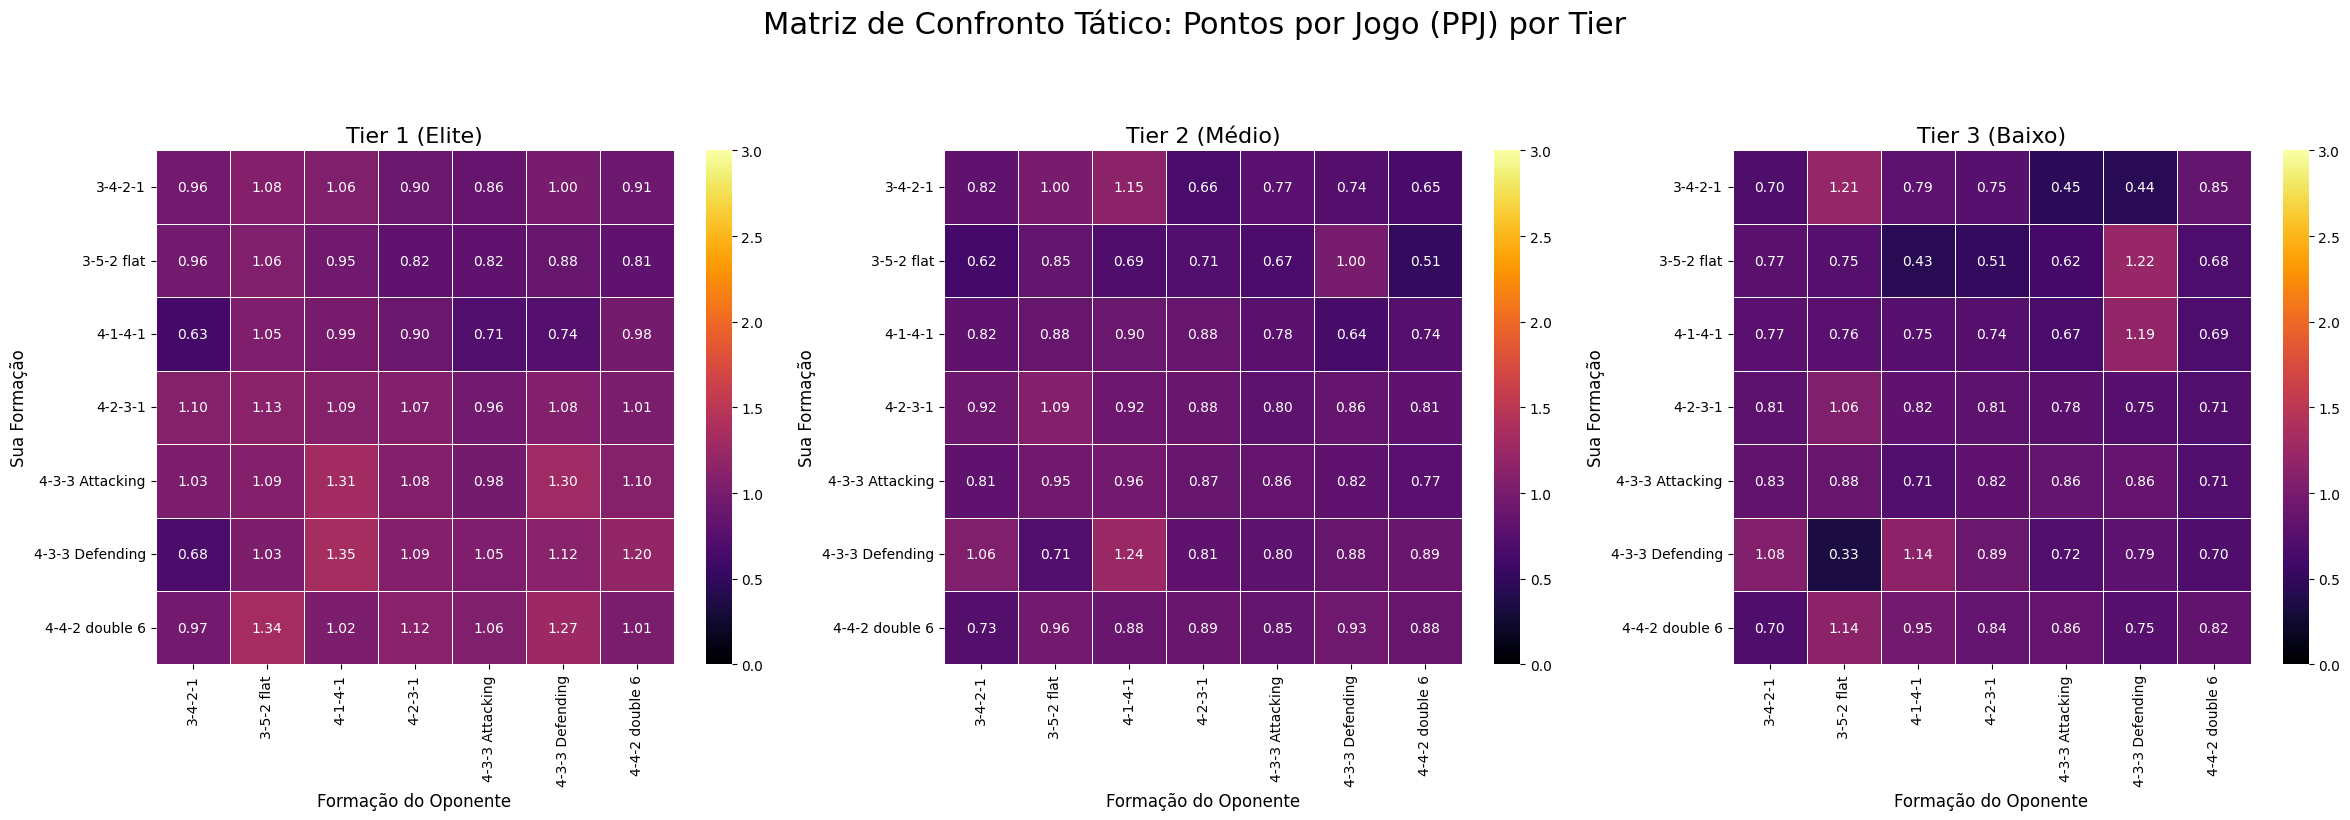

In [36]:
# Cria uma figura com 1 linha e 3 colunas (uma para cada tier)
fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharey=False)
fig.suptitle('Matriz de Confronto Tático: Pontos por Jogo (PPJ) por Tier', fontsize=22, y=1.02)

tiers = ['Tier 1 (Elite)', 'Tier 2 (Médio)', 'Tier 3 (Baixo)']

for i, tier in enumerate(tiers):
    ax = axes[i]
    
    # Pivotar os dados para o tier atual
    matriz_pivotada = matriz_performance[matriz_performance['tier'] == tier].pivot_table(
        index='formacao', 
        columns='formacao_oponente', 
        values='ppj_medio'
    )
    
    # Criar o heatmap
    sns.heatmap(
        ax=ax,
        data=matriz_pivotada,
        annot=True,         
        fmt=".2f",         
        cmap='inferno',    
        linewidths=.5,
        vmin=0.0, vmax=3,            
    )
    
    ax.set_title(tier, fontsize=16)
    ax.set_xlabel('Formação do Oponente', fontsize=12)
    ax.set_ylabel('Sua Formação', fontsize=12) 

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Análise dos Resultados
Os heatmaps revelam padrões claros sobre como os confrontos táticos ditam o ritmo de um jogo:

As Formações "Abertas": confrontos envolvendo táticas naturalmente ofensivas, como a 4-3-3 Attacking e a 4-3-3 Defending, consistentemente resultam em partidas com mais gols. As linhas e colunas correspondentes a essas formações são visivelmente mais altas, indicando que sua presença em campo, seja como protagonista ou oponente, tende a gerar jogos com mais ação.

Duelos de Neutralização: Em contraste, confrontos espelhados de formações mais equilibradas ou defensivas tendem a se anular.

O Fator Tier: Diferente da análise de PPJ, a média de gols totais não parece variar drasticamente entre os Tiers. Um jogo no Tier 3 pode ser tão aberto quanto um no Tier 1. Isso sugere que o "estilo" do confronto é mais dependente das intenções táticas das formações do que do nível técnico absoluto das equipes.

Insight Chave
O numero de gols de uma partida não é aleatório, mas sim um produto previsível do embate tático. Esta análise complementa perfeitamente a de PPJ, revelando que é possível ter um confronto taticamente equilibrado (PPJ perto de 1.5) que seja, ao mesmo tempo, um jogo aberto com bastante gols, ou uma batalha defensiva e de poucos gols.

C:\Users\plugify\AppData\Local\Temp\ipykernel_28088\1365832321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_confronto_filtrado['gols_totais'] = df_confronto_filtrado['gols_marcados'] + df_confronto_filtrado['gols_sofridos']
C:\Users\plugify\AppData\Local\Temp\ipykernel_28088\1365832321.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  matriz_estilo = df_confronto_filtrado.groupby(['tier', 'formacao', 'formacao_oponente']).agg(


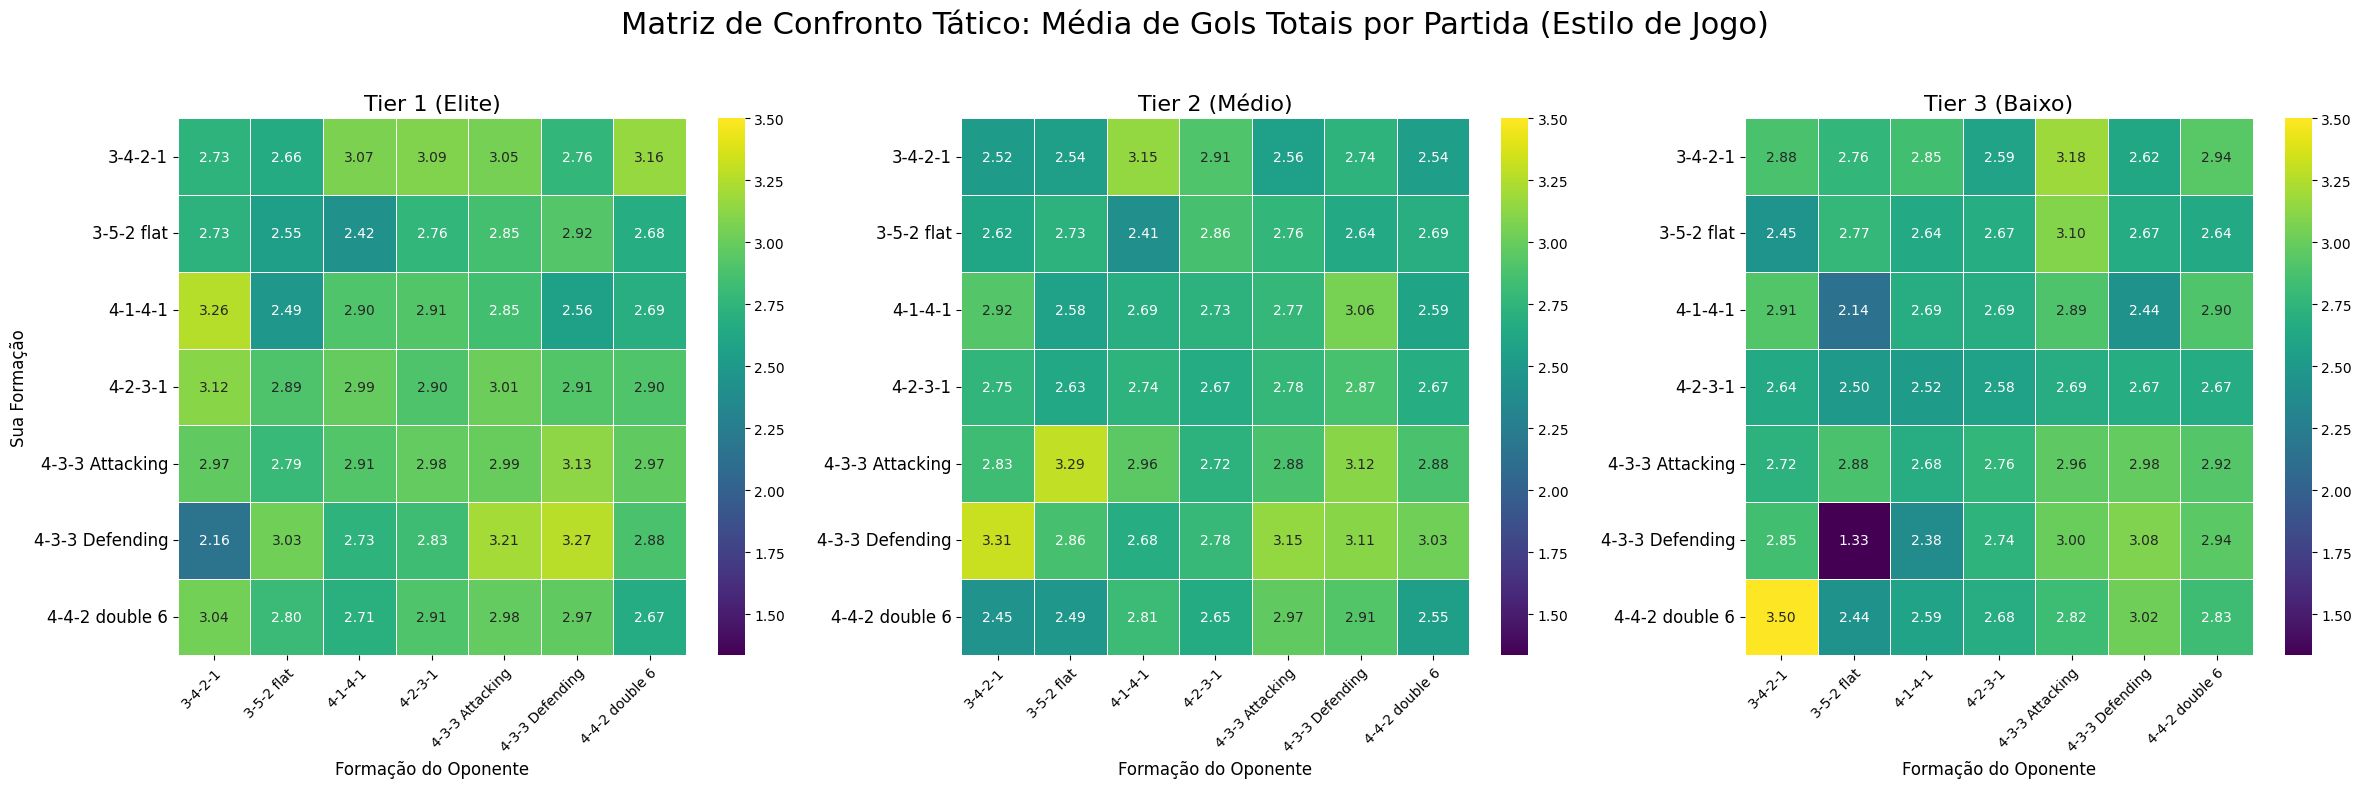

In [42]:
#preparar dados para a matriz de estilo de jogo
df_confronto_filtrado['gols_totais'] = df_confronto_filtrado['gols_marcados'] + df_confronto_filtrado['gols_sofridos']
matriz_estilo = df_confronto_filtrado.groupby(['tier', 'formacao', 'formacao_oponente']).agg(
    gols_totais_medio=('gols_totais', 'mean')
).reset_index()


fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharey=False)
fig.suptitle('Matriz de Confronto Tático: Média de Gols Totais por Partida (Estilo de Jogo)', fontsize=22, y=0.98)

tiers = ['Tier 1 (Elite)', 'Tier 2 (Médio)', 'Tier 3 (Baixo)']

#  limites da escala de cores para consistência
vmin = matriz_estilo['gols_totais_medio'].min()
vmax = matriz_estilo['gols_totais_medio'].max()

for i, tier in enumerate(tiers):
    ax = axes[i]
    
    matriz_pivotada = matriz_estilo[matriz_estilo['tier'] == tier].pivot_table(
        index='formacao', 
        columns='formacao_oponente', 
        values='gols_totais_medio'
    )
    
    sns.heatmap(
        ax=ax,
        data=matriz_pivotada,
        annot=True,
        fmt=".2f",
        cmap='viridis',   
        linewidths=.5,
        vmin=vmin,
        vmax=vmax
    )
    
    ax.set_title(tier, fontsize=16)
    ax.set_xlabel('Formação do Oponente', fontsize=12)
    ax.set_ylabel('Sua Formação' if i == 0 else '', fontsize=12)
    ax.tick_params(axis='y', labelsize=12, rotation=0)

for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Análise do Efeito do Treinador

A estratégia para medir este efeito é calcular o "Delta de Vitória" para cada treinador em cada contexto tático específico. 

- O processo consiste em:
- Calcular a Baseline: Primeiro, calculamos a taxa de vitória média para cada situação única (Tier + Formação + Localização). Este valor representa a "performance esperada" ou a média do mercado.
- Calcular a Performance Individual: Em seguida, calculamos a taxa de vitória específica de cada treinador naquelas mesmas situações.
- Calcular o Delta: O "Delta de Vitória" é a simples subtração: Performance do Treinador - Performance da Baseline. Um delta positivo indica que o treinador superou a média; um negativo, que ficou abaixo.
- Garantir Relevância Estatística: Para evitar conclusões baseadas em sorte ou em poucas partidas, filtramos a análise para incluir apenas casos onde um treinador comandou um time por mais de 30 jogos naquela situação específica.

In [20]:
# Preparar o dataframe com o nome do treinador 
treinadores = games[['game_id', 'home_club_manager_name', 'away_club_manager_name']]
df_com_treinador = pd.merge(df_full, treinadores, on='game_id')
df_com_treinador['nome_treinador'] = np.where(
    df_com_treinador['localizacao'] == 'Casa',
    df_com_treinador['home_club_manager_name'],
    df_com_treinador['away_club_manager_name']
)
df_com_treinador.dropna(subset=['nome_treinador'], inplace=True)


def calcula_vitoria(row):
    if (row['localizacao'] == 'Casa' and row['resultado_final'] == 'Vitoria_Casa') or \
       (row['localizacao'] == 'Fora' and row['resultado_final'] == 'Derrota_Casa'):
        return 1
    else:
        return 0
df_com_treinador['vitoria'] = df_com_treinador.apply(calcula_vitoria, axis=1)


In [21]:
# Calcular a taxa de vitória média por treinador e comparar com a baseline
baseline_performance = df_com_treinador.groupby(['tier', 'formacao', 'localizacao']).agg(
    baseline_vitoria=('vitoria', 'mean')
).reset_index()
manager_performance = df_com_treinador.groupby(['tier', 'formacao', 'localizacao', 'nome_treinador']).agg(
    taxa_vitoria_treinador=('vitoria', 'mean'),
    total_jogos=('game_id', 'count')
).reset_index()

manager_performance_filtrado = manager_performance[manager_performance['total_jogos'] > 30]
df_final_treinador = pd.merge(
    manager_performance_filtrado,
    baseline_performance,
    on=['tier', 'formacao', 'localizacao']
)
df_final_treinador['delta_vitoria'] = df_final_treinador['taxa_vitoria_treinador'] - df_final_treinador['baseline_vitoria']
df_final_treinador_sorted = df_final_treinador.sort_values('delta_vitoria', ascending=False)



C:\Users\plugify\AppData\Local\Temp\ipykernel_28088\109221740.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  baseline_performance = df_com_treinador.groupby(['tier', 'formacao', 'localizacao']).agg(
C:\Users\plugify\AppData\Local\Temp\ipykernel_28088\109221740.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  manager_performance = df_com_treinador.groupby(['tier', 'formacao', 'localizacao', 'nome_treinador']).agg(


## Impacto de um treinador

Os Overperformers: No topo da lista, vemos nomes de reputação mundial como Pep Guardiola e Antonio Conte. A análise quantifica o que o senso comum sugere: em seus contextos específicos (Guardiola com a 4-1-4-1, Conte com a 3-4-2-1), eles entregaram uma taxa de vitória mais de 30 pontos percentuais (+0.30) acima do que seria esperado para um time de mesmo nível usando a mesma tática.

Os Underperformers: Da mesma forma, a análise identifica situações onde treinadores, mesmo experientes como Roy Hodgson, tiveram uma performance significativamente abaixo da média com uma tática específica (4-3-3 Attacking), com um delta negativo superior a 20% (-0.20).

O Contexto é Rei: É crucial notar que o gráfico analisa a performance de um treinador com uma formação específica. O mesmo treinador poderia aparecer em outro lugar da lista (ou nem aparecer) com uma tática diferente. Isso reforça que o sucesso é uma combinação do treinador certo, com a filosofia tática certa, no time certo.

Insight Chave
A análise quantifica: o treinador certo na situação certa pode ser um diferencial massivo, agregando um valor que pode ser medido em até 30% a mais de vitórias. O "efeito do treinador" não é um mito, mas um fator estatisticamente relevante e potente que pode definir o sucesso ou o fracasso de uma temporada.


--- Gerando Visualização 1: Ranking Geral com Anotações nas Barras ---


C:\Users\plugify\AppData\Local\Temp\ipykernel_28088\3836388384.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


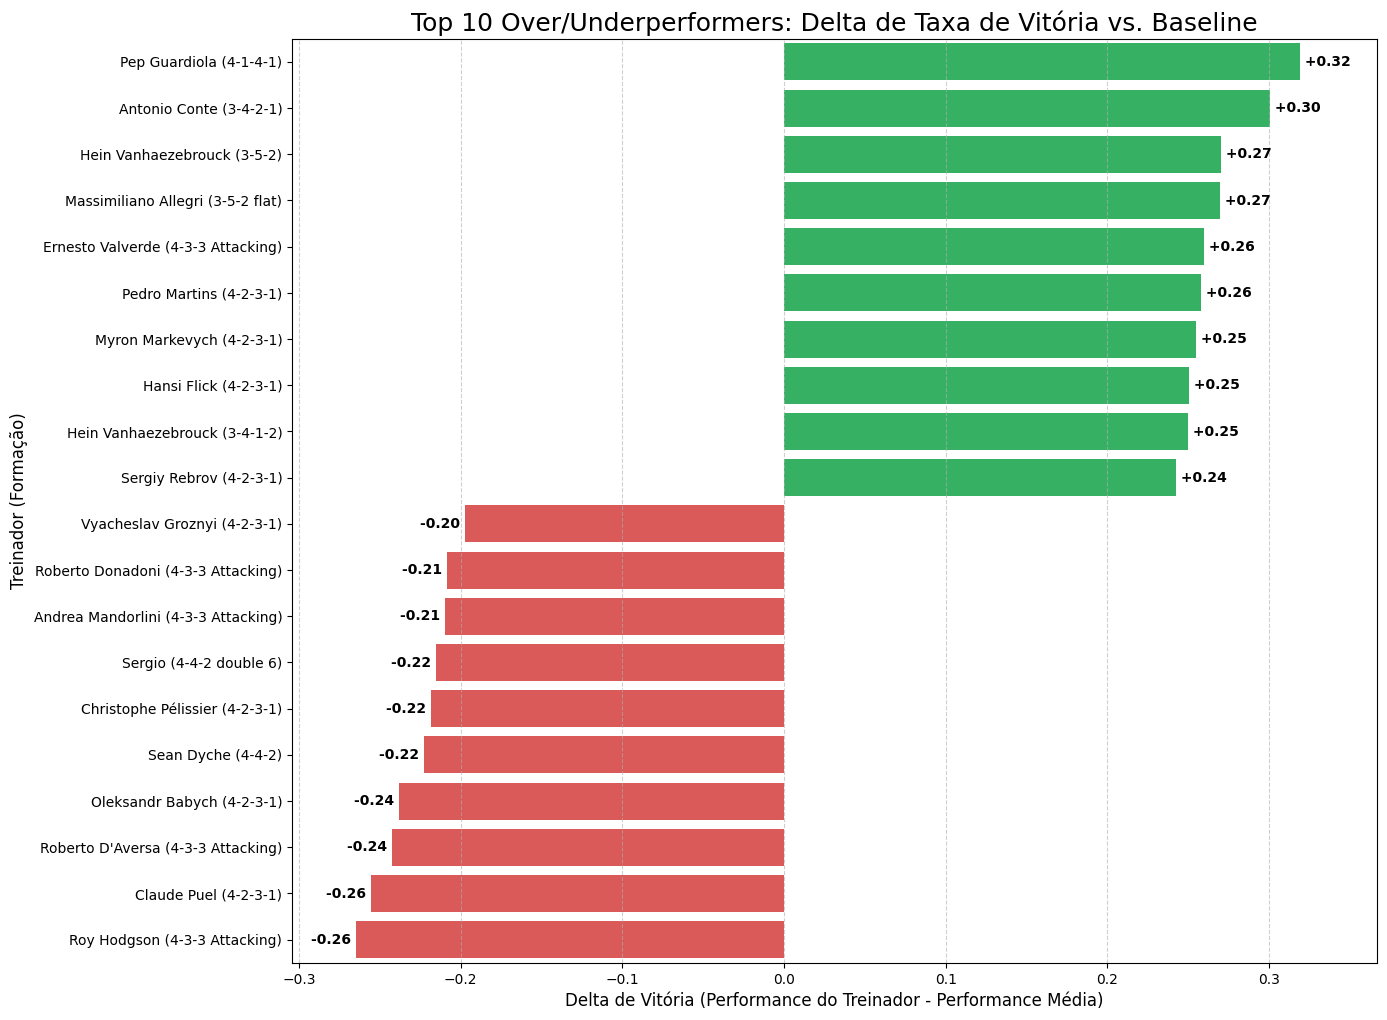

In [ ]:
# Juntando o Top 10 e o Bottom 10 para plotar no mesmo gráfico
top_10 = df_final_treinador_sorted.head(10)
bottom_10 = df_final_treinador_sorted.tail(10)
df_plot_ranking = pd.concat([top_10, bottom_10])

# Criando um identificador único para o eixo Y
df_plot_ranking['id_unico'] = df_plot_ranking['nome_treinador'] + " (" + df_plot_ranking['formacao'] + ")"
df_plot_ranking = df_plot_ranking.sort_values('delta_vitoria', ascending=False)

palette = ['#22c55e' if x > 0 else '#ef4444' for x in df_plot_ranking['delta_vitoria']]

plt.figure(figsize=(14, 12)) 
ax = sns.barplot(
    x='delta_vitoria',
    y='id_unico',
    data=df_plot_ranking,
    palette=palette
)

for p in ax.patches:
    # Pegamos a largura da barra, que é o valor do delta
    width = p.get_width()
    
    # Formatamos o texto para ter o sinal de '+' ou '-' e 2 casas decimais
    text_label = f"{width:+.2f}"
    
    # Definimos a posição X e Y do texto
    x = width 
    y = p.get_y() + p.get_height() / 2
    
    if width > 0:
        ax.text(x, y, f' {text_label}', va='center', ha='left', size=10, color='black', weight='bold')
    else:
        ax.text(x, y, f'{text_label} ', va='center', ha='right', size=10, color='black', weight='bold')


plt.title('Top 10 Over/Underperformers: Delta de Taxa de Vitória vs. Baseline', fontsize=18)
plt.xlabel('Delta de Vitória (Performance do Treinador - Performance Média)', fontsize=12)
plt.ylabel('Treinador (Formação)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xlim(df_plot_ranking['delta_vitoria'].min() * 1.15, df_plot_ranking['delta_vitoria'].max() * 1.15)
plt.show()

Estudo de Caso Guardiola


C:\Users\plugify\AppData\Local\Temp\ipykernel_28088\605690336.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_caso = sns.barplot(


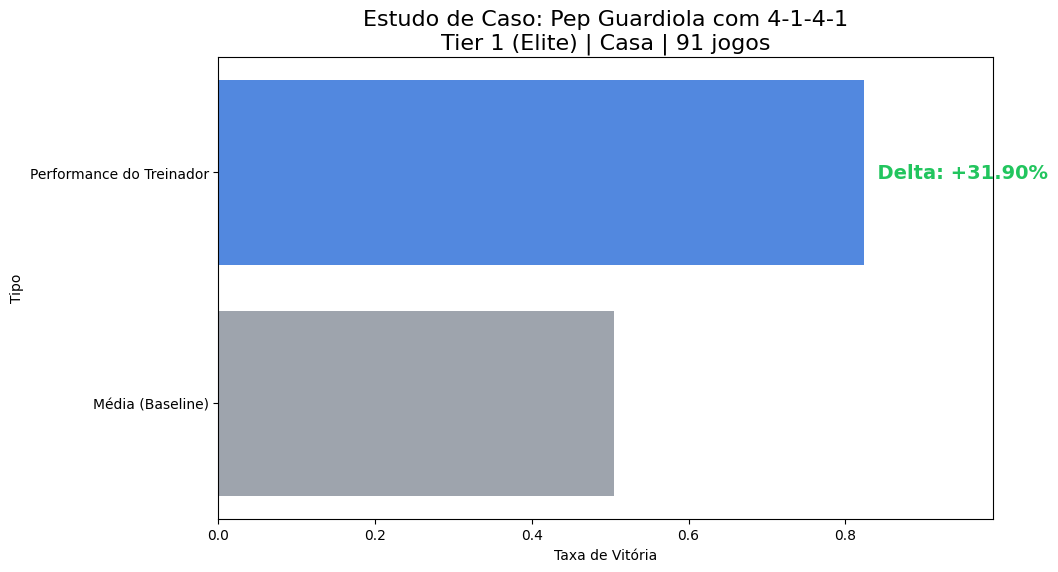

In [ ]:
# Guardiola
melhor_caso = df_final_treinador_sorted.iloc[0]

# Criamos um dataframe simples para o plot
df_estudo_caso = pd.DataFrame({
    'Tipo': ['Performance do Treinador', 'Média (Baseline)'],
    'Taxa de Vitória': [melhor_caso['taxa_vitoria_treinador'], melhor_caso['baseline_vitoria']]
})

plt.figure(figsize=(10, 6))
ax_caso = sns.barplot(
    x='Taxa de Vitória',
    y='Tipo',
    data=df_estudo_caso,
    palette=['#3b82f6', '#9ca3af']
)
# Anotando os valores e o delta
delta_formatado = f"{melhor_caso['delta_vitoria']:+.2%}"
plt.title(f"Estudo de Caso: {melhor_caso['nome_treinador']} com {melhor_caso['formacao']}\n{melhor_caso['tier']} | {melhor_caso['localizacao']} | {melhor_caso['total_jogos']} jogos", fontsize=16)
ax_caso.text(melhor_caso['taxa_vitoria_treinador'], 0, f"  Delta: {delta_formatado}", 
             color='#22c55e', va='center', ha='left', weight='bold', size=14)

plt.xlim(0, max(df_estudo_caso['Taxa de Vitória']) * 1.2)
plt.show()

## Análise da Evolução Tática ao Longo dos Anos

In [24]:
#coluna ano
if 'date' not in df_full.columns:
    df_full = pd.merge(df_full, games[['game_id', 'date']], on='game_id', how='left')
    df_full['date'] = pd.to_datetime(df_full['date'])
df_full['ano'] = df_full['date'].dt.year


O cenário tático do futebol não é estático, mas vive em ciclos dinâmicos. A análise revela uma década marcada pelo domínio de um sistema principal (4-2-3-1), seguida por um período de transição e o surgimento de um novo desafiante (4-3-3 Attacking). Isso ilustra a constante busca por inovação e vantagem tática no esporte, onde a popularidade de um sistema inevitavelmente leva ao desenvolvimento de outros para neutralizá-lo.

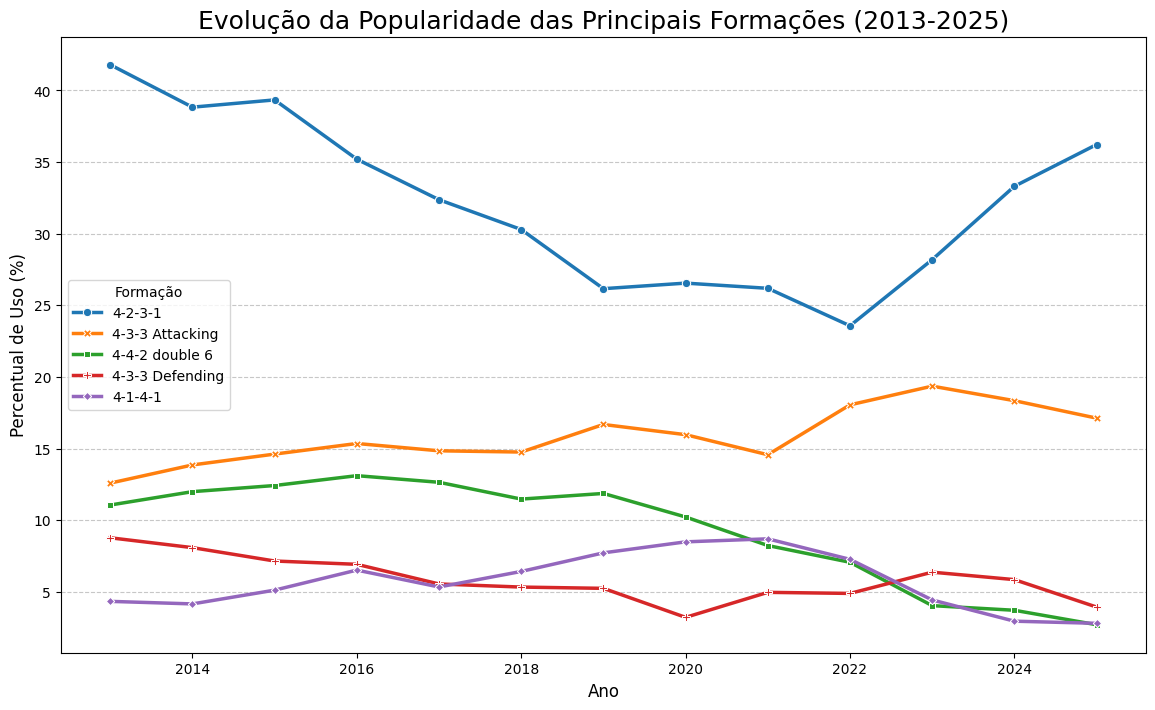

In [25]:
# ECalcular percentual de uso de cada formação por ano
popularidade_anual = df_full.groupby('ano')['formacao'].value_counts(normalize=True).mul(100).rename('percentual_uso').reset_index()

# Seleciona as formações mais comuns para não poluir o gráfico
common_formations = df_full['formacao'].value_counts().nlargest(5).index
popularidade_filtrada = popularidade_anual[popularidade_anual['formacao'].isin(common_formations)]

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=popularidade_filtrada,
    x='ano',
    y='percentual_uso',
    hue='formacao',
    linewidth=2.5,
    style='formacao',
    markers=True,
    dashes=False
)
plt.title('Evolução da Popularidade das Principais Formações (2013-2025)', fontsize=18)
plt.ylabel('Percentual de Uso (%)', fontsize=12)
plt.xlabel('Ano', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Formação')
plt.show()


## Análise Tática por Liga

In [26]:
# Garantir que temos o 'competition_id' dataframe principal
if 'competition_id' not in df_full.columns:
     df_full = pd.merge(df_full, games[['game_id', 'competition_id']], on='game_id', how='left')

# Juntando com a tabela de competições
colunas_competicao = ['competition_id', 'name', 'competition_code']
df_com_liga = pd.merge(df_full, competitions[colunas_competicao], on='competition_id', how='left', suffixes=('', '_comp'))


In [27]:
COLUNA_DE_FILTRO = 'competition_code' 
if COLUNA_DE_FILTRO not in df_com_liga.columns:
    if f"{COLUNA_DE_FILTRO}_comp" in df_com_liga.columns:
        COLUNA_DE_FILTRO = f"{COLUNA_DE_FILTRO}_comp"
        print(f"AVISO: A coluna foi renomeada para '{COLUNA_DE_FILTRO}'. Usando este nome para o filtro.")
    else:
        print(f"ERRO CRÍTICO: A coluna '{COLUNA_DE_FILTRO}' não foi encontrada. Abortando.")

principais_ligas = ['premier-league', 'laliga', 'serie-a', 'bundesliga', 'ligue-1', 'uefa-champions-league', 'uefa-europa-league']
df_ligas = df_com_liga[df_com_liga[COLUNA_DE_FILTRO].isin(principais_ligas)]


- A Convergência para o 4-2-3-1: A primeira conclusão é a forte convergência tática na elite do futebol. Quatro das cinco principais ligas (Bundesliga, Ligue 1, Premier League e LaLiga) exibem uma estrutura de preferência quase idêntica. O 4-2-3-1 reina como o sistema dominante com uma margem considerável, seguido quase sempre pelo 4-3-3 Attacking. Isso sugere a existência de um "meta" tático internacional adotado pela maioria dos clubes de ponta.

- A Exceção Italiana: A Serie A emerge como a grande e fascinante exceção a essa regra. O gráfico da liga italiana mostra um cenário muito mais plural. Embora o 4-2-3-1 seja popular, ele compete em pé de igualdade com o 4-3-3 Attacking e, crucialmente, com o 3-5-2 flat. O uso proeminente de um sistema com três zagueiros é uma assinatura tática que distingue claramente a Itália das outras grandes nações do futebol, refletindo sua rica herança tática.

Apesar de uma aparente homogeneização tática em torno do 4-2-3-1 na Europa, "escolas" de futebol com identidades regionais, como a italiana, ainda persistem e exercem forte influência. A Serie A se mantém como um bastião da diversidade tática, demonstrando que, mesmo no mais alto nível, não existe uma única fórmula para o sucesso.


Encontrados 45330 jogos das ligas principais. Gerando gráfico...


C:\Users\plugify\AppData\Local\Temp\ipykernel_28088\683452517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


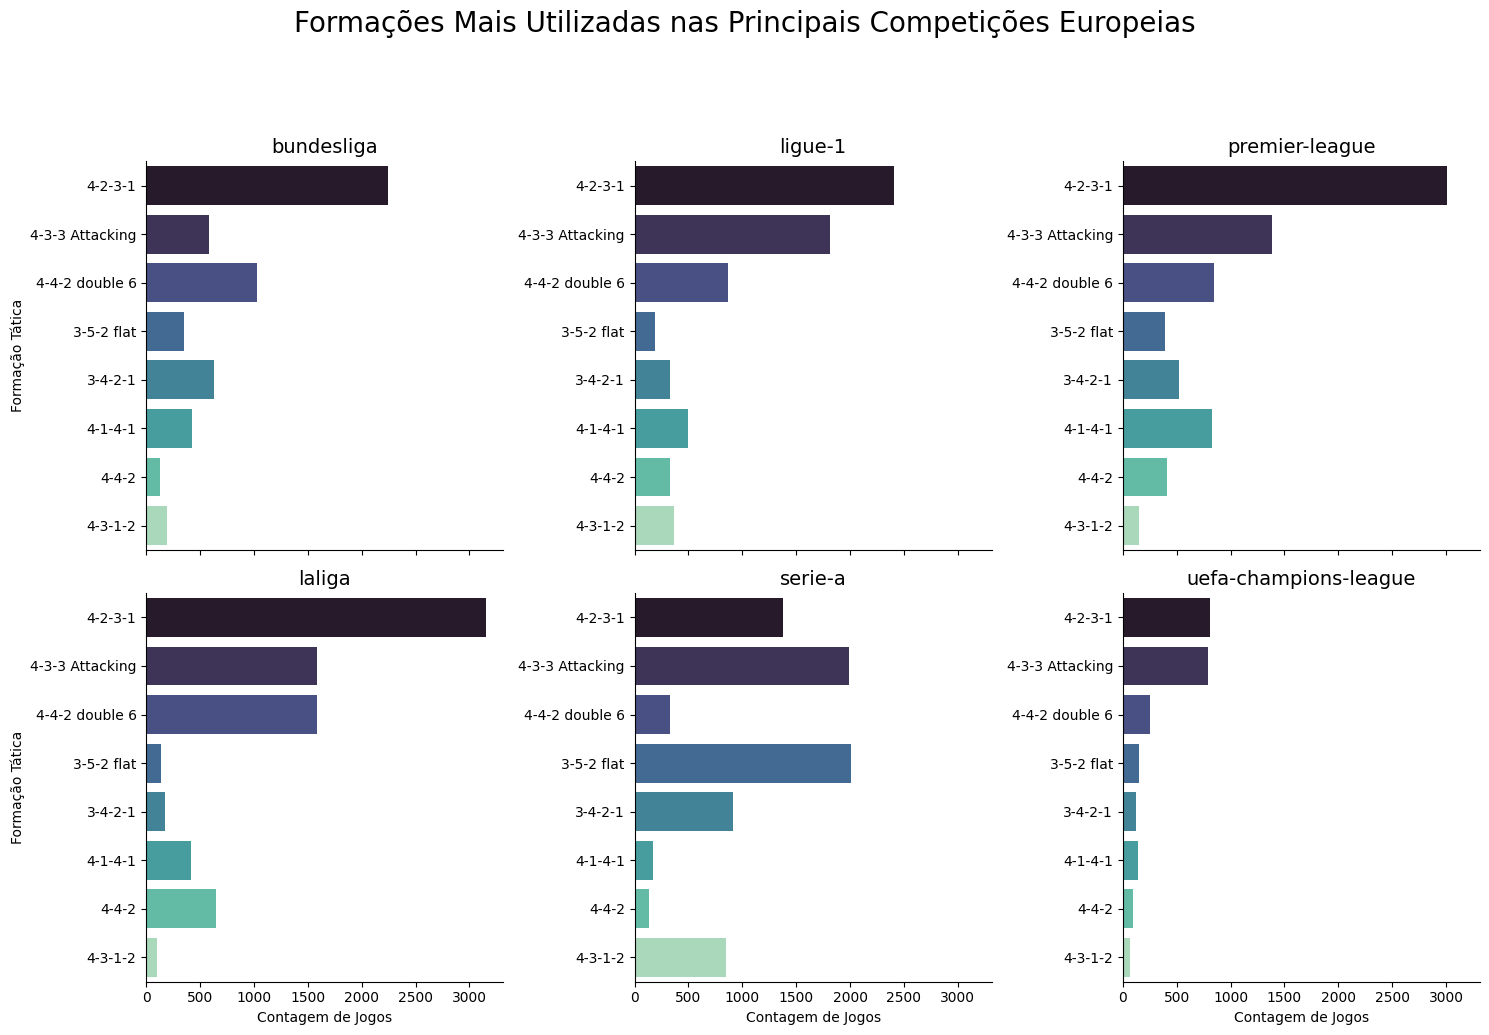

In [28]:
if not df_ligas.empty:
    print(f"\nEncontrados {len(df_ligas)} jogos das ligas principais. Gerando gráfico...")
    g = sns.catplot(
        data=df_ligas, y='formacao', col='name', kind='count',
        order=df_ligas['formacao'].value_counts().nlargest(8).index,
        palette='mako', col_wrap=3, sharey=False
    )
    g.set_titles("{col_name}", size=14)
    g.set_axis_labels("Contagem de Jogos", "Formação Tática")
    plt.suptitle('Formações Mais Utilizadas nas Principais Competições Europeias', y=1.03, size=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
else:
    print("\nAVISO: Nenhum jogo das ligas principais foi encontrado após o filtro.")
